## Prediction of benign and malignant breast cancer using data mining techniques



This analysis aims to observe which features are most helpful in predicting malignant or benign breast cancer (data  from UCI machine learning repository)

In [1]:
#Check Python Version
import sys
import scipy
import numpy
import matplotlib
import sklearn
import warnings; warnings.simplefilter('ignore')
print('Python: {}'.format(sys.version))


Python: 3.6.7 | packaged by conda-forge | (default, Nov 21 2018, 02:32:25) 
[GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]


In [2]:
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection 
from sklearn.model_selection  import cross_validate, GridSearchCV, train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error as mse

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('bc_wisconsin.data', sep=",", header=None)
df.columns=['id', 'clump_thick', 'uniform_cell_size', 'uniform_cell_shape','marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df.head()
df.describe()

,id,clump_thick,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


#### Preprocess the data

In [4]:
#looks like there are 16 '?'' values for the feature bare_nuclei
#there are two (may be more) ways to mitigate this
#we can replace it with nan and drop the rows that have na values
#df.replace('?',np.nan, inplace=True)
#df.dropna(axis=0, how='any', inplace=True)

#Or substitute each row with na, and then replace na with the mean value computed for  each class, 
# (here benign or malignant classes)
#let us do second method
#first find the mean values for bare_nuclei for each class
test_df=df.copy(deep=True)
test_df.replace('?',np.nan, inplace=True)
test_df.dropna(axis=0, how='any', inplace=True)
test_df=test_df.astype(int) #after na substitution, bare_nuclei is not int64, so we need to convert it to int64
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
id                        683 non-null int64
clump_thick               683 non-null int64
uniform_cell_size         683 non-null int64
uniform_cell_shape        683 non-null int64
marginal_adhesion         683 non-null int64
single_epithelial_size    683 non-null int64
bare_nuclei               683 non-null int64
bland_chromatin           683 non-null int64
normal_nucleoli           683 non-null int64
mitoses                   683 non-null int64
class                     683 non-null int64
dtypes: int64(11)
memory usage: 64.0 KB


In [5]:
#this cell here is  just to get an idea of the mean values
#mean value of bare_nuclei for benign case amd malignant case from the cleaned up data set
bn_mean_benign = test_df[test_df['class'] == 2].bare_nuclei.mean() 
print(bn_mean_benign)
bn_mean_malign = test_df[test_df['class'] == 4].bare_nuclei.mean() 
print(bn_mean_malign)
bn_mean = test_df.bare_nuclei.mean()
print(bn_mean)

1.3468468468468469
7.627615062761507
3.5446559297218156


In [6]:
#first replace ? with na
df.replace('?',np.nan, inplace=True)
#replace na with the mean value computed for  each class, 
#df["bare_nuclei"].fillna(test_df.groupby("class")["bare_nuclei"].transform("mean"), inplace=True)
#df["bare_nuclei"].fillna(test_df.groupby("class")["bare_nuclei"].transform("mean"))

df["bare_nuclei"].fillna(bn_mean,inplace=True)
df=df.astype(float)

df.describe() 

,id,clump_thick,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.601852,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [7]:
#drop the ID column
df.drop(['id'], 1, inplace=True)

In [8]:
# Quick glimpse of tumor features in relation to diagnosis
df.groupby('class').mean()

,clump_thick,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
class,,,,,,,,,
2.0,2.956332,1.325328,1.443231,1.364629,2.120087,1.414029,2.100437,1.290393,1.063319
4.0,7.195021,6.572614,6.560166,5.547718,5.298755,7.593732,5.979253,5.863071,2.589212


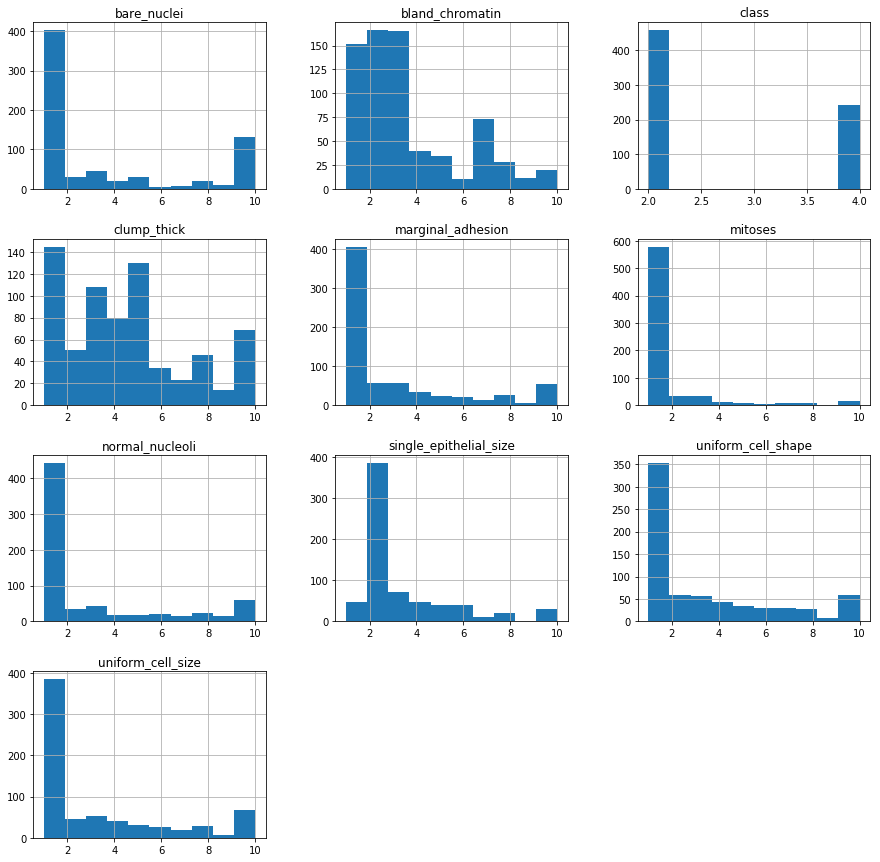

In [9]:
# Plot histograms for each variable
df.hist(figsize = (15, 15))
plt.show()

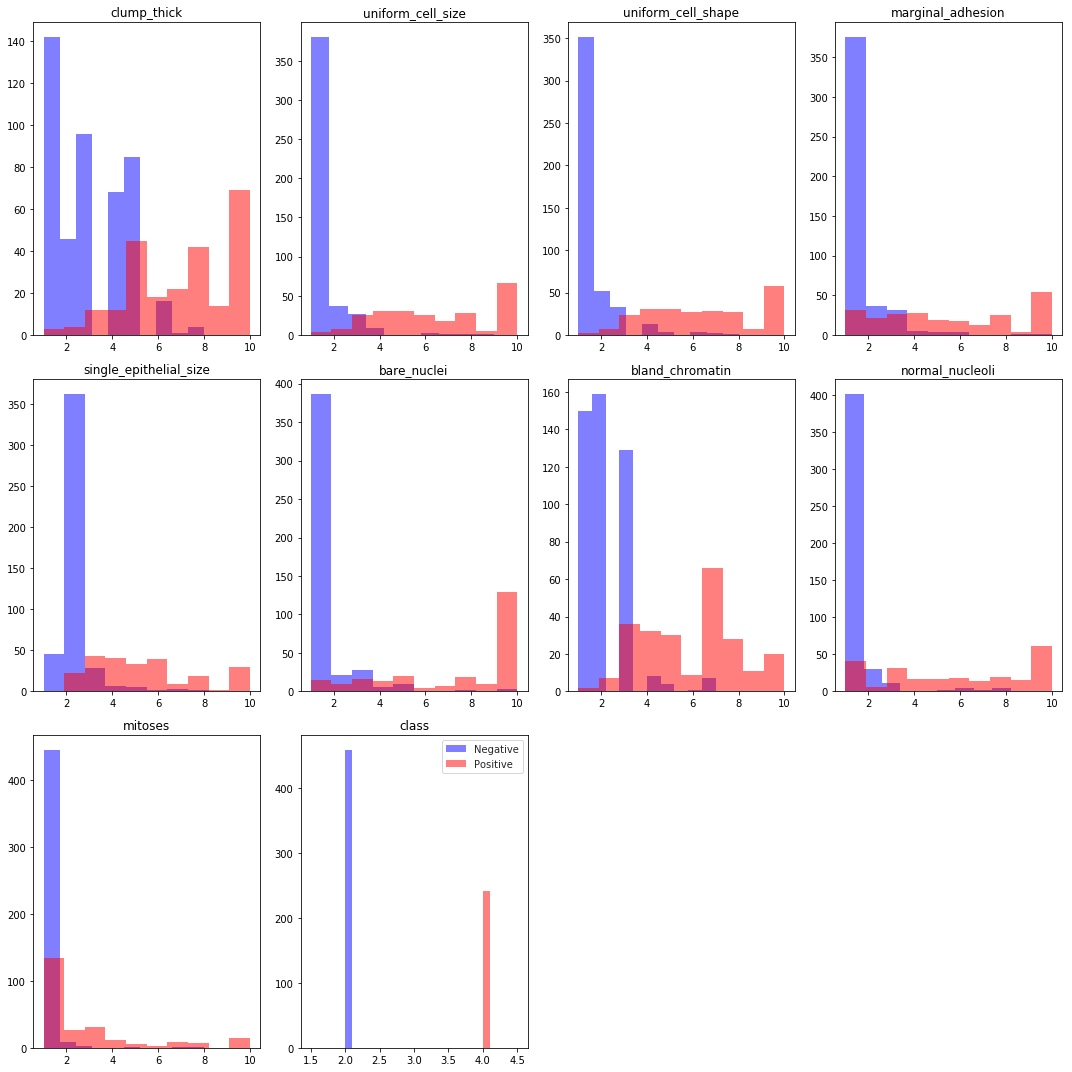

In [10]:
# Visualize tumor characteristics for positive and negatives diagnoses 
df_b = df[df['class'] == 2] #benign
df_m = df[df['class'] == 4] #malignant

fig = plt.figure(figsize=(15,15))
                 
for i,b in enumerate(list(df.columns[0:10])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.hist(df_b[b], label ='Negative', stacked = True, alpha=0.5, color= 'b')
    ax.hist(df_m[b], label= 'Positive', stacked = True, alpha=0.5, color= 'r')
    #ax.hist(df_b[b], label ='Negative', stacked = True, alpha=0.5, color= 'b')
    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()

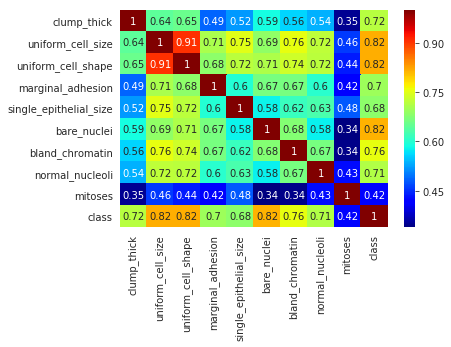

In [11]:
# corelation plot of features and diagnoses
sns.heatmap(df.corr(),cmap="jet",annot=True)
sns.set_style("whitegrid")
plt.show()

#### Test out some models

In [13]:
# Define parameters for optimization using dictionaries {parameter name: parameter list}

SVM_params = {'C':[0.001, 0.1, 10, 100], 'kernel':['rbf' ,'linear', 'poly', 'sigmoid']}
LR_params = {'C':[0.001, 0.1, 1, 10, 100]}
LDA_params = {'n_components':[None, 1,2,3], 'solver':['svd'], 'shrinkage':[None]}
KNN_params = {'n_neighbors':[1,5,10,20, 50], 'p':[2], 'metric':['minkowski']}
RF_params = {'n_estimators':[10,50,100]}
DTC_params = {'criterion':['entropy', 'gini'], 'max_depth':[10, 50, 100]}

In [14]:
# Create X and Y datasets for training
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
# Testing Options
seed = 7
scoring = 'accuracy'

In [16]:
#test with baseline model (ie only default parameter values)
models_baseline = []
models_baseline.append(('LR', LogisticRegression(),{}))
models_baseline.append(('LDA', LinearDiscriminantAnalysis(),{}))
models_baseline.append(('KNN', KNeighborsClassifier(),{}))
models_baseline.append(('DTC', DecisionTreeClassifier(),{}))                      
models_baseline.append(('RFC', RandomForestClassifier(),{}))
models_baseline.append(('SVM', SVC(),{}))

# Append list of models with parameter dictionaries

models_opt = []

models_opt.append(('LR', LogisticRegression(), LR_params))
models_opt.append(('LDA', LinearDiscriminantAnalysis(), LDA_params))
models_opt.append(('KNN', KNeighborsClassifier(),KNN_params))
models_opt.append(('DTC', DecisionTreeClassifier(), DTC_params))
models_opt.append(('RFC', RandomForestClassifier(), RF_params))
models_opt.append(('SVM', SVC(), SVM_params))

In [17]:
'''
# Define models to train
#models = []
#models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
#models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
'''
results=[]
names=[]

def evaluateModels(param_dict, scoring = 'accuracy'):
    for name, model, params in param_dict:
    
        #kfold = KFold(len(X_train_norm), n_folds=5, random_state=seed, shuffle=True)
        kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
        model_grid = model_selection.GridSearchCV(model, params)
        cv_results = model_selection.cross_val_score(model_grid, X_train, y_train, cv = kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "Cross Validation %s: Accuracy on training set: %f SD: %f" % (name, cv_results.mean(), cv_results.std())

        print(msg)    
   
    

In [18]:
#Model evaluation
results=[]
names=[]
evaluateModels(models_opt,scoring='accuracy')

Cross Validation LR: Accuracy on training set: 0.962468 SD: 0.023187
Cross Validation LDA: Accuracy on training set: 0.958896 SD: 0.019605
Cross Validation KNN: Accuracy on training set: 0.960649 SD: 0.020815
Cross Validation DTC: Accuracy on training set: 0.951786 SD: 0.030981
Cross Validation RFC: Accuracy on training set: 0.967825 SD: 0.020803
Cross Validation SVM: Accuracy on training set: 0.951656 SD: 0.022794


In [19]:
results=[]
names=[]
evaluateModels(models_baseline,scoring='accuracy')

Cross Validation LR: Accuracy on training set: 0.962468 SD: 0.016809
Cross Validation LDA: Accuracy on training set: 0.958896 SD: 0.019605
Cross Validation KNN: Accuracy on training set: 0.976786 SD: 0.022658
Cross Validation DTC: Accuracy on training set: 0.949903 SD: 0.019253
Cross Validation RFC: Accuracy on training set: 0.967825 SD: 0.023671
Cross Validation SVM: Accuracy on training set: 0.962468 SD: 0.029266


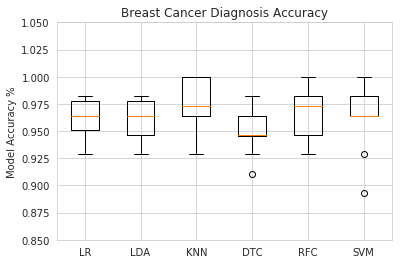

In [20]:

# Visualize model accuracies for comparision - boxplots will be appropriate to visualize 
# data variation

plt.boxplot(results, labels = names)
plt.title('Breast Cancer Diagnosis Accuracy' )
plt.ylabel('Model Accuracy %')
sns.set_style("whitegrid")
plt.ylim(0.85,1.05)
plt.show()

In [21]:
#Make predictions on test data set

def makePredictions(param_dict):
    for name, model, params in param_dict:
# Make predictions  on validation dataset
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        print("===================================================")
        print(name)
        print(accuracy_score(y_test, predictions))
        print(classification_report(y_test, predictions))
        

In [22]:
makePredictions(models_baseline)

LR
0.95
              precision    recall  f1-score   support

         2.0       0.97      0.96      0.96        90
         4.0       0.92      0.94      0.93        50

   micro avg       0.95      0.95      0.95       140
   macro avg       0.94      0.95      0.95       140
weighted avg       0.95      0.95      0.95       140

LDA
0.9571428571428572
              precision    recall  f1-score   support

         2.0       0.98      0.96      0.97        90
         4.0       0.92      0.96      0.94        50

   micro avg       0.96      0.96      0.96       140
   macro avg       0.95      0.96      0.95       140
weighted avg       0.96      0.96      0.96       140

KNN
0.95
              precision    recall  f1-score   support

         2.0       0.98      0.94      0.96        90
         4.0       0.91      0.96      0.93        50

   micro avg       0.95      0.95      0.95       140
   macro avg       0.94      0.95      0.95       140
weighted avg       0.95      0.95 

#### A close look at random forest classifier

In [23]:
# Parameters
RF_params = {'n_estimators':[5,10,15,20,25,100]}

# Instantiate RFC
RFC = RandomForestClassifier(random_state=42)

# Instantiate gridsearch using RFC model and dictated parameters
RFC_grid = GridSearchCV(RFC, RF_params)

# Fit model to training data
RFC_grid.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [5, 10, 15, 20, 25, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [24]:
# Print out best parameters
RFC_grid.best_params_

{'n_estimators': 100}

In [25]:
# Instantiate above RFC with best value of n_estimators 
RFC = RandomForestClassifier(random_state=seed, n_estimators=10)
# Fit RFC to training data
RFC.fit(X_train, y_train)

# Predict on training data using fitted RFC

# Evalaute RFC with test data
RFC_predicted = RFC.predict(X_test)
print('Model accuracy on test data: {}'.format(accuracy_score(y_test, RFC_predicted)))
#RFC.feature_importances_

Model accuracy on test data: 0.95


In [26]:
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), RFC.feature_importances_), df.columns),reverse=True))

Features sorted by their score:
[(0.2997, 'uniform_cell_size'), (0.1671, 'normal_nucleoli'), (0.1378, 'bland_chromatin'), (0.1198, 'bare_nuclei'), (0.0977, 'uniform_cell_shape'), (0.0807, 'clump_thick'), (0.0768, 'single_epithelial_size'), (0.0155, 'marginal_adhesion'), (0.0047, 'mitoses')]


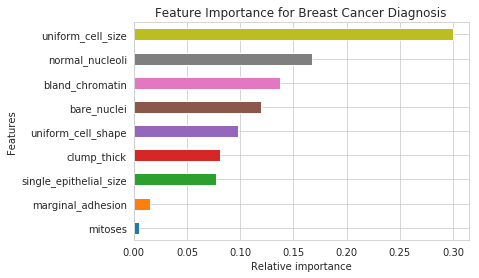

In [27]:
#feature_importances = pd.DataFrame(RFC.feature_importances_, index = df.columns, columns=['importance']).sort_values('importance',ascending=False)
feature_importances = pd.Series(RFC.feature_importances_, index = df.columns[:-1])
#print(feature_importances.sort_values(ascending=False))
plt.title('Feature Importance for Breast Cancer Diagnosis')
plt.xlabel('Relative importance')
plt.ylabel('Features')
feature_importances.sort_values(ascending=True).plot(kind='barh')


In [28]:
#Check with a new  test case (let us use SVC )
clf = SVC()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

test = np.array([[4,2,1,1,1,2,3,2,1]]) #new values
#test = test.reshape(len(test), -1)
#test

0.95


In [29]:
prediction = clf.predict(test) #predict class
print(prediction) # 2 for benign, 4 for malignant

[2.]
